In [34]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import warnings
warnings.filterwarnings("ignore")

In [51]:
N = 500
T = 100
dir_path = 'resultData/'
file_path = dir_path + 'result_' + str(N) + '-' + str(T) + '.csv'
print(file_path)

resultData/result_500-100.csv


In [52]:
# df = pd.read_csv(file_path, float_precision = 2)
df = pd.read_csv(file_path)
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,group,norm type,rho,eta,near factor,S or R,Sample,Linear Shrinkage,Nonlinear Shrinkage,Info Band
0,S,fro,0.8,0.5,0.5,47.622487,50.296711,32.151188,31.844045,40.092936
1,R,fro,0.8,0.5,0.5,47.622487,49.747580,32.089594,31.785577,39.958684
2,S,2,0.8,0.5,0.5,8.993148,13.611765,7.004762,6.838739,7.614110
3,R,2,0.8,0.5,0.5,8.993148,13.152236,6.995332,6.837062,7.611582
4,S,fro,0.8,0.5,2.0,47.622487,50.296711,32.151188,31.844045,40.066351


 compute the error rate $$\frac{\|A - \hat A_i\|}{\| A \|}.$$
 Here $A$ is covariance $\Sigma$ or correlation $R$, and $i$ stands for an estimation method.

In [53]:
esti_types = ['Sample', 'Linear Shrinkage', 'Nonlinear Shrinkage', 'Info Band']
for col in esti_types:
    new_col = col + ' err'
    df[new_col] = df[col] / df['S or R']
df.drop(columns = esti_types + ['S or R'], inplace = True)
df.head()

,group,norm type,rho,eta,near factor,Sample err,Linear Shrinkage err,Nonlinear Shrinkage err,Info Band err
0,S,fro,0.8,0.5,0.5,1.056155,0.675126,0.668677,0.841891
1,R,fro,0.8,0.5,0.5,1.044624,0.673833,0.667449,0.839072
2,S,2,0.8,0.5,0.5,1.513571,0.778900,0.760439,0.846657
3,R,2,0.8,0.5,0.5,1.462473,0.777851,0.760252,0.846376
4,S,fro,0.8,0.5,2.0,1.056155,0.675126,0.668677,0.841333


In [63]:
rho_range = df['rho'].unique()
eta_range = df['eta'].unique()
near_factor_range = df['near factor'].unique()
print(rho_range, eta_range, near_factor_range, sep = '\n')

[0.8  0.9  0.95 0.99]
[0.5 0.8 1. ]
[0.5 2. ]


In [66]:
tmp = df[(df['group'] == 'R') & (df['norm type'] == '2') & (df['eta'] == 1)]
tmp.drop(columns = ['group', 'norm type'], inplace = True)

In [67]:
tmp
# tmp.groupby(['rho', 'near factor']).apply(lambda x: x[:])

,rho,eta,near factor,Sample err,Linear Shrinkage err,Nonlinear Shrinkage err,Info Band err
19,0.80,1.0,0.5,1.462473,0.777851,0.760252,0.874972
23,0.80,1.0,2.0,1.462473,0.777851,0.760252,0.874972
43,0.90,1.0,0.5,0.850709,0.641200,0.612690,0.834809
47,0.90,1.0,2.0,0.850709,0.641200,0.612690,0.834809
67,0.95,1.0,0.5,0.471139,0.403346,0.381214,0.211453
71,0.95,1.0,2.0,0.471139,0.403346,0.381214,0.182694
91,0.99,1.0,0.5,0.130355,0.157116,0.155709,0.199999
95,0.99,1.0,2.0,0.130355,0.157116,0.155709,0.209140


 # 3D plot

In [42]:
def f(x, y):
    r = np.sqrt(x ** 2 + y ** 2)
    r1 = np.sqrt((x - 2) ** 2 + (y + 1) ** 2)
    sigma = 0.2
    return np.sin(r) #- np.exp(- r1 ** 2 / sigma) / sigma

delta = 0.5
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

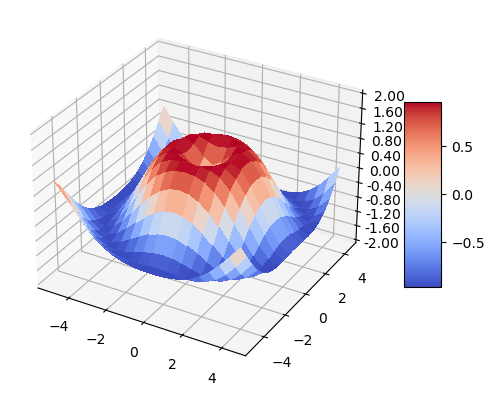

In [43]:
# fig = plt.figure(figsize = (12, 8))
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# ax = fig.gca(projection = '3d')
# ax = plt.axes(projection = '3d')
surf1 = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, 
                       linewidth = 0, antialiased = False)
# surf2 = ax.plot_surface(X, Y, 5 * Z, cmap = cm.coolwarm, 
                    #    linewidth = 0, antialiased = False)
ax.set_zlim(-2, 2)
ax.zaxis.set_major_locator(LinearLocator(11))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf1, shrink=0.5, aspect=5)
# fig.colorbar(surf2, shrink=0.5, aspect=5)
plt.show()

In [44]:
# %matplotlib notebook
ax = fig.add_subplot(111, projection = '3d')
for xi in x:
    for yi in y:
        print(xi, yi)
        ax.bar(int(xi), int(yi), zs=f(xi, yi), zdir='y', alpha=0.8)
plt.show()

-5.0 -5.0


TypeError: object of type 'int' has no len()

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d') 
# Make data.


R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

: 

In [ ]:
surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)

: 

In [ ]:
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
 
# Add a color bar which maps values to colors.

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

: 

In [ ]:
from scipy.interpolate import make_interp_spline

x=np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2])
y=np.array([0.57,0.85,0.66,0.84,0.59,0.55,0.61,0.76,0.54,0.55,0.48])

x_new = np.linspace(x.min(), x.max(),500)
y_smooth = make_interp_spline(x, y)(x_new)

plt.plot (x_new,y_smooth)
plt.scatter (x, y)

: 

In [ ]:
tmp = df.set_index(['group', 'norm type', 'rho']).sort_index()

: 

 # See the results in groups

In [ ]:
group = 'R' # change to 'S'
norm_type = '2' # change to other norms, 1 or 2

: 

In [ ]:
tmp = df[(df['group'] == group) & (df['norm type'] == norm_type)]
tmp.drop(columns = ['group', 'norm type'], inplace = True)

: 

In [ ]:
id_cols = ['rho', 'eta', 'near factor']
tmp.set_index(id_cols)

: 

In [ ]:
# id_cols = id_cols[1:] + [id_cols[0]] # permutation

: 

In [ ]:
df.sort_index(inplace = True)

: 

In [ ]:
with open('latex/Res.json', 'w') as f:
    f.write(df.to_latex())

: 

In [ ]:
's'+str(100)

: 